# ROI analysis

Analysis for segmented regions of interest: volume, T1 values, any associated statistics

In [1]:
# initialize libraries
library(plyr)
#library(dplyr)
library(digest)
library(reshape2)
library(ggplot2)
library(stringr) # for dataframe string parsing

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# initialize variables
df_rois <- read.table('~/Documents/GitHub/zona-analysis/data/warped_seg_csv/combined_warp_seg_rois.csv', sep=",", header=TRUE)

tf <- ddply(df_rois, .(roi), summarize, t1map=mean(mean), t1map_sd=sd(mean))

# modify slightly so that ROIs categorized into GM,  WM, and "control" regions
cf <- data.frame(roi = tf$roi, class = c("GM","WM","WM","WM","WM","WM","WM","CTRL","GM","CTRL","GM"))
df_rois <- merge(df_rois,cf)

# order of presenting data (ZI, WM tracts of interest, control regions of interest)
roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")

names(df_rois)
head(df_rois)
str(df_rois)

[1] "roi"        "subjid"     "side"       "vol_voxels" "vol_mm"    
 [6] "centroid_x" "centroid_y" "centroid_z" "mean"       "sd"        
[11] "class"

roi,subjid,side,vol_voxels,vol_mm,centroid_x,centroid_y,centroid_z,mean,sd,class
cZI,sub-C001,L,282,97.21209,-13.384992,-3.959397,-25.53296,1243.869,88.96735,GM
cZI,sub-C002,L,271,93.42012,-10.155740,-15.776793,-45.84741,1212.469,76.40970,GM
cZI,sub-C003,L,255,87.90359,-6.721844,-19.315618,-22.90735,1276.349,94.77732,GM
cZI,sub-C004,L,263,90.66233,-12.538042,-12.146402,-37.80495,1274.460,89.50912,GM
cZI,sub-C005,L,238,82.04424,-10.024102,-13.336284,-20.69577,1310.693,86.84567,GM
cZI,sub-C006,L,204,70.32364,-9.889788,-7.443727,-18.75445,1275.147,87.62435,GM


'data.frame':	704 obs. of  11 variables:
 $ roi       : Factor w/ 11 levels "cZI","fct","fl",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ subjid    : Factor w/ 32 levels "sub-C001","sub-C002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ side      : Factor w/ 2 levels "L","R": 1 1 1 1 1 1 1 1 1 1 ...
 $ vol_voxels: int  282 271 255 263 238 204 224 265 291 230 ...
 $ vol_mm    : num  97.2 93.4 87.9 90.7 82 ...
 $ centroid_x: num  -13.38 -10.16 -6.72 -12.54 -10.02 ...
 $ centroid_y: num  -3.96 -15.78 -19.32 -12.15 -13.34 ...
 $ centroid_z: num  -25.5 -45.8 -22.9 -37.8 -20.7 ...
 $ mean      : num  1244 1212 1276 1274 1311 ...
 $ sd        : num  89 76.4 94.8 89.5 86.8 ...
 $ class     : Factor w/ 3 levels "CTRL","GM","WM": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
# manipulations to make sure ordered in roi_order way for readability
df_rois$roi <- factor(df_rois$roi, levels = roi_order)
rowidx <- order(df_rois[,"roi"])

In [4]:
# summarize metrics for each ROI
#summary_all_roi_metrics <- ddply(df_rois, .(roi,side), summarize, vol_voxels_mean=mean(vol_voxels), vol_voxels_sd=sd(vol_voxels), vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm), t1map=mean(mean), t1map_sd=sd(mean))
#summary_all_roi_metrics

# data to be included in final table with coordinates
ddply(df_rois, .(roi), summarize, vol_voxels_mean=mean(vol_voxels), vol_voxels_sd=sd(vol_voxels), vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm), t1map=mean(mean), t1map_sd=sd(mean))

roi,vol_voxels_mean,vol_voxels_sd,vol_mm_mean,vol_mm_sd,t1map,t1map_sd
cZI,242.53125,25.14464,83.60596,8.667974,1279.745,35.99973
rZI,490.95312,47.36599,169.24256,16.328270,1258.204,37.38514
ZI,732.28125,64.86310,252.43378,22.359990,1265.433,34.83001
fct,393.65625,38.54876,135.70214,13.288732,1127.918,30.51832
fl,150.81250,16.47786,51.98845,5.680339,1180.154,34.40665
ft,244.43750,25.64586,84.26309,8.840771,1143.050,35.14175
hf,158.31250,16.41706,54.57387,5.659368,1145.485,41.09459
hfields,445.85938,46.02824,153.69774,15.867121,1158.122,34.49591
ml,98.45312,16.90208,33.93900,5.826543,1190.311,31.17122
RN,859.85938,80.75160,296.41282,27.837092,1094.862,32.66755


## Relaxometry Results

T1 relaxometry results. Clear differences in T1 relaxometry values for ZI versus surrounding white matter regions and also relative to surrounding gray matter structures (red nucleus and subthalamic nucleus).

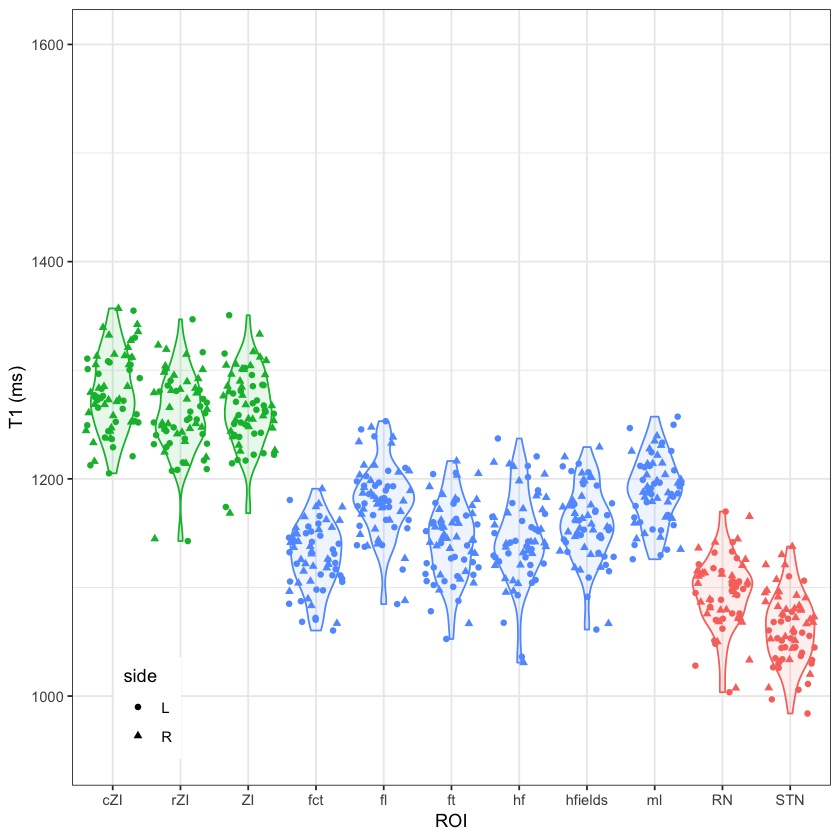

In [5]:
# create plot with specific ROI ordering
roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")
g <- ggplot(data = df_rois, aes(roi,mean)) + geom_violin(alpha = 0.1, aes(color=class,fill=class)) +
    geom_jitter(aes(color=class,shape=side)) +
    scale_x_discrete(name="ROI",limits=roi_order) +
    scale_y_continuous(name="T1 (ms)",limits=c(950,1600)) +
    theme_bw() + guides(size = "legend", colour = "none", fill = "none") +
    theme(legend.position=c(0.1, 0.1))
g


In [6]:
pdf(file = "~/Documents/GitHub/zona-analysis/figures/fig_T1_relaxometry.pdf", width = 5, height = 5)
g
dev.off()

pdf 
  2

In [7]:
unique(df_rois$roi)

[1] cZI     fct     fl      ft      hf      hfields ml      RN      rZI    
[10] STN     ZI     
Levels: cZI rZI ZI fct fl ft hf hfields ml RN STN

Statistical testing using wilcoxon testing with bonferonni adjustment demonstrating significant differences between ZI and other regions.

In [8]:
wt <- wilcox.test(x = subset(df_rois,roi=="cZI")$mean, y = subset(df_rois,roi=="ZI")$mean)
#wilcox.test(x = subset(df_rois,roi=="cZI")$mean, y = subset(df_rois,roi=="rZI")$mean)
#wilcox.test(x = subset(df_rois,roi=="cZI")$mean, y = subset(df_rois,roi=="fct")$mean)
#names(wt)

roi_df <- data.frame(roi1=character(),
                 roi2=character(), 
                 statistic=double(), 
                 p.value=double(),
                 stringsAsFactors=TRUE) 

# wilcox tests for cZI
for (curr_roi in unique(df_rois$roi))
{
    d <- ddply(df_rois, .(roi),
      function(x) {
          w <- wilcox.test(subset(df_rois,roi==curr_roi)$mean,x$mean,data=x)
          with(w,data.frame(statistic,p.value))
      })
    d <- cbind(curr_roi,d)
    roi_df <- rbind(roi_df,d)
    
}

#subset(roi_df)

In [9]:
unique(df_rois$roi)
roi_pvals <- subset(roi_df, (as.character(roi) > as.character(curr_roi))) # just get all the unique comparisons

# Multiple comparisons correction (Bonferroni)
roi_pvals$pval_adjusted <- p.adjust(roi_pvals$p.value,"bonferroni")
roi_pvals$pval_significant <- (roi_pvals$pval_adjusted < 0.05)

roi_pvals[,c(4,5)] <- round( roi_pvals[,c(4,5)], 4)
#subset(roi_pvals, pval_significant==TRUE) # only shows that were significant after correction
roi_pvals

[1] cZI     fct     fl      ft      hf      hfields ml      RN      rZI    
[10] STN     ZI     
Levels: cZI rZI ZI fct fl ft hf hfields ml RN STN

,curr_roi,roi,statistic,p.value,pval_adjusted,pval_significant
2,cZI,rZI,2678,0.0027,0.1485,FALSE
3,cZI,ZI,2471,0.0441,1.0000,FALSE
4,cZI,fct,4096,0.0000,0.0000,TRUE
5,cZI,fl,4017,0.0000,0.0000,TRUE
6,cZI,ft,4092,0.0000,0.0000,TRUE
7,cZI,hf,4080,0.0000,0.0000,TRUE
8,cZI,hfields,4082,0.0000,0.0000,TRUE
9,cZI,ml,3996,0.0000,0.0000,TRUE
10,cZI,RN,4096,0.0000,0.0000,TRUE
11,cZI,STN,4096,0.0000,0.0000,TRUE


## Volume Results

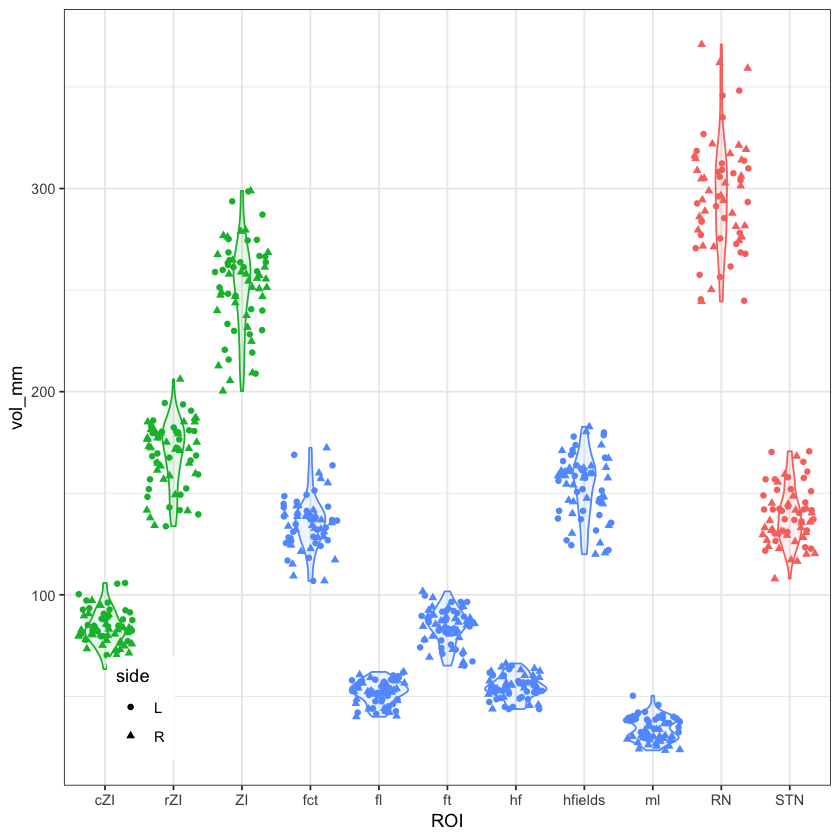

In [10]:
# plot: not necessary to include in main manuscript
#roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")
roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")
g <- ggplot(data = df_rois, aes(roi,vol_mm)) + geom_violin(alpha = 0.1, aes(color=class,fill=class)) +
    geom_jitter(aes(color=class,shape=side)) +
    scale_x_discrete(name="ROI",limits=roi_order) +
#    scale_y_continuous(name="T1 (ms)",limits=c(950,1400)) +
    theme_bw() + guides(size = "legend", colour = "none", fill = "none") +
    theme(legend.position=c(0.1, 0.1))
g

## Coordinates

Compute the coordinates for each CoM based on the midcommissural point.

In [11]:
# initialize variables and load in all the afids data then calculate the MCP
setwd('~/Documents/GitHub/zona-analysis/data/input_afid_subjects_postQC/')

df_afid <- read.table('~/Documents/GitHub/zona-analysis/etc/afids.csv', sep=",", header=TRUE)

df_subjects <- data.frame(fid=integer(),X=double(),Y=double(),Z=double(),
                        subjid=factor(), name=character(),description=character(),stringsAsFactors = FALSE)

csv_files <- list.files(".", "*.fcsv")

for (i in 1:length(csv_files)) {
        curr_split <- unlist(strsplit(csv_files[i],"_"))
        
        curr_subject <- read.table(csv_files[i], header=FALSE, sep=",")
        df_subject <- data.frame(fid = 1:length(curr_subject$V1))
        
        df_subject <- cbind(df_subject,X=curr_subject[2],Y=curr_subject[3],Z=curr_subject[4],
                          subjid=as.factor(curr_split[1]), name=curr_subject[12], description=curr_subject[13])
        
        df_subject <- plyr::rename(df_subject, c("V2"="X","V3"="Y","V4"="Z","V12"="name","V13"="description"))
        df_subjects <- rbind(df_subjects,df_subject)
}

df_AC <- subset(df_subjects, fid == 1)
df_PC <- subset(df_subjects, fid == 2)

df_ACPC <- merge(df_AC, df_PC, by=c("subjid"))
df_ACPC <- plyr::rename(df_ACPC, c("X.x"="AC_X","Y.x"="AC_Y","Z.x"="AC_Z",
                                   "X.y"="PC_X","Y.y"="PC_Y","Z.y"="PC_Z"))
df_ACPC <- subset(df_ACPC, select = c(subjid, AC_X, AC_Y, AC_Z, PC_X, PC_Y, PC_Z))
df_ACPC$MCP_X <- (df_ACPC$AC_X + df_ACPC$PC_X) / 2.0
df_ACPC$MCP_Y <- (df_ACPC$AC_Y + df_ACPC$PC_Y) / 2.0
df_ACPC$MCP_Z <- (df_ACPC$AC_Z + df_ACPC$PC_Z) / 2.0
#df_ACPC

In [12]:
# calculate the centroids for each structure after normalization
df_rois_with_MCP <- df_rois
#df_rois_with_MCP$MCP_centroid_x <- df_rois_with_MCP$centroid_x - subset(df_ACPC, )

dfm <- data.frame(  MCP_centroid_x = 1:length(df_rois_with_MCP$roi),
                    MCP_centroid_y = 1:length(df_rois_with_MCP$roi),
                    MCP_centroid_z = 1:length(df_rois_with_MCP$roi))

for (i in 1:length(df_rois_with_MCP$roi)) {
        
        dfm$MCP_centroid_x[i] <- df_rois_with_MCP$centroid_x[i] - subset(df_ACPC, subjid == df_rois_with_MCP$subjid[i] )$MCP_X
        dfm$MCP_centroid_y[i] <- df_rois_with_MCP$centroid_y[i] - subset(df_ACPC, subjid == df_rois_with_MCP$subjid[i] )$MCP_Y
        dfm$MCP_centroid_z[i] <- df_rois_with_MCP$centroid_z[i] - subset(df_ACPC, subjid == df_rois_with_MCP$subjid[i] )$MCP_Z

}

df_rois_with_MCP <- cbind(df_rois_with_MCP,dfm)
head(df_rois_with_MCP)


roi,subjid,side,vol_voxels,vol_mm,centroid_x,centroid_y,centroid_z,mean,sd,class,MCP_centroid_x,MCP_centroid_y,MCP_centroid_z
cZI,sub-C001,L,282,97.21209,-13.384992,-3.959397,-25.53296,1243.869,88.96735,GM,-13.59080,-8.802065,-5.060911
cZI,sub-C002,L,271,93.42012,-10.155740,-15.776793,-45.84741,1212.469,76.40970,GM,-12.03212,-6.348238,-6.164611
cZI,sub-C003,L,255,87.90359,-6.721844,-19.315618,-22.90735,1276.349,94.77732,GM,-12.04729,-9.365631,-5.277319
cZI,sub-C004,L,263,90.66233,-12.538042,-12.146402,-37.80495,1274.460,89.50912,GM,-12.99700,-8.823180,-5.620163
cZI,sub-C005,L,238,82.04424,-10.024102,-13.336284,-20.69577,1310.693,86.84567,GM,-13.42312,-7.569002,-4.392932
cZI,sub-C006,L,204,70.32364,-9.889788,-7.443727,-18.75445,1275.147,87.62435,GM,-11.20304,-8.275177,-3.220854


In [13]:
# summarize metrics ROI (not lateralizing i.e. no side)
summary_all_roi_metrics_noside <- ddply(df_rois_with_MCP, .(roi), summarize,
    vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm),
    t1map=mean(mean), t1map_sd=sd(mean))
summary_all_roi_metrics_noside


roi,vol_mm_mean,vol_mm_sd,t1map,t1map_sd
cZI,83.60596,8.667974,1279.745,35.99973
rZI,169.24256,16.328270,1258.204,37.38514
ZI,252.43378,22.359990,1265.433,34.83001
fct,135.70214,13.288732,1127.918,30.51832
fl,51.98845,5.680339,1180.154,34.40665
ft,84.26309,8.840771,1143.050,35.14175
hf,54.57387,5.659368,1145.485,41.09459
hfields,153.69774,15.867121,1158.122,34.49591
ml,33.93900,5.826543,1190.311,31.17122
RN,296.41282,27.837092,1094.862,32.66755


In [14]:
# summarize metrics ROI and side
summary_all_roi_metrics <- ddply(df_rois_with_MCP, .(roi,side), summarize,
    vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm),
    t1map=mean(mean), t1map_sd=sd(mean),
    MCP_x_mean=mean(MCP_centroid_x), MCP_x_sd=sd(MCP_centroid_x),
    MCP_y_mean=mean(MCP_centroid_y), MCP_y_sd=sd(MCP_centroid_y),
    MCP_z_mean=mean(MCP_centroid_z), MCP_z_sd=sd(MCP_centroid_z))
summary_all_roi_metrics


roi,side,vol_mm_mean,vol_mm_sd,t1map,t1map_sd,MCP_x_mean,MCP_x_sd,MCP_y_mean,MCP_y_sd,MCP_z_mean,MCP_z_sd
cZI,L,87.38714,8.053654,1272.858,34.72717,-12.421461,0.7771605,-8.04125385,1.1491487,-5.1587014,1.1767778
cZI,R,79.82479,7.636287,1286.632,36.46733,12.591021,0.8084022,-7.67561541,1.2062416,-5.1238458,1.0872542
rZI,L,168.72009,16.636868,1250.437,36.81539,-6.966242,0.5445300,1.68820825,0.5254836,-0.7878552,0.5318883
rZI,R,169.76503,16.262726,1265.972,36.88428,7.107267,0.6069895,2.44349794,0.6146769,-0.8768401,0.5941821
ZI,L,254.29743,22.465394,1258.607,34.36183,-8.822170,0.5621105,-1.61331369,0.6331960,-2.2721234,0.5154973
ZI,R,250.57013,22.454441,1272.259,34.47407,8.857325,0.6139881,-0.81485960,0.7283847,-2.2756911,0.4648152
fct,L,136.02532,12.786195,1120.540,30.53604,-10.243955,0.6837166,-5.24471275,0.7807172,-2.1092044,0.8342688
fct,R,135.37896,13.970500,1135.296,29.11957,9.995464,0.6709184,-4.83158541,0.8798764,-2.6181720,0.7270196
fl,L,51.77301,5.885776,1178.880,34.86141,-6.087103,0.5624391,3.35636281,0.4988085,-0.4863526,0.6476194
fl,R,52.20390,5.552940,1181.429,34.45509,6.653320,0.6364130,3.80557831,0.6343005,-0.5115011,0.7593492


## Manuscript Tables

In [15]:
formatted_summary_all_roi_metrics <- summary_all_roi_metrics[,1:2]

formatted_summary_all_roi_metrics$vol_mm <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics$vol_mm_mean,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics$vol_mm_sd,1)))

formatted_summary_all_roi_metrics$t1map <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics$t1map,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics$t1map_sd,1)))

formatted_summary_all_roi_metrics$MCP_x <- paste0(
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_x_mean,2)), '±',
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_x_sd,2)))

formatted_summary_all_roi_metrics$MCP_y <- paste0(
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_y_mean,2)), '±',
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_y_sd,2)))

formatted_summary_all_roi_metrics$MCP_z <- paste0(
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_z_mean,2)), '±',
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_z_sd,2)))

formatted_summary_all_roi_metrics

write.table(formatted_summary_all_roi_metrics, file = "~/Documents/GitHub/zona-analysis/data/output_tables/Table01_metrics.csv", row.names = FALSE, quote = FALSE, sep = ",")

roi,side,vol_mm,t1map,MCP_x,MCP_y,MCP_z
cZI,L,87.4±8.1,1272.9±34.7,-12.42±0.78,-8.04±1.15,-5.16±1.18
cZI,R,79.8±7.6,1286.6±36.5,12.59±0.81,-7.68±1.21,-5.12±1.09
rZI,L,168.7±16.6,1250.4±36.8,-6.97±0.54,1.69±0.53,-0.79±0.53
rZI,R,169.8±16.3,1266.0±36.9,7.11±0.61,2.44±0.61,-0.88±0.59
ZI,L,254.3±22.5,1258.6±34.4,-8.82±0.56,-1.61±0.63,-2.27±0.52
ZI,R,250.6±22.5,1272.3±34.5,8.86±0.61,-0.81±0.73,-2.28±0.46
fct,L,136.0±12.8,1120.5±30.5,-10.24±0.68,-5.24±0.78,-2.11±0.83
fct,R,135.4±14.0,1135.3±29.1,10.00±0.67,-4.83±0.88,-2.62±0.73
fl,L,51.8±5.9,1178.9±34.9,-6.09±0.56,3.36±0.50,-0.49±0.65
fl,R,52.2±5.6,1181.4±34.5,6.65±0.64,3.81±0.63,-0.51±0.76


In [16]:
formatted_summary_all_roi_metrics_noside <- summary_all_roi_metrics_noside[,1:2]

formatted_summary_all_roi_metrics_noside$vol_mm <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$vol_mm_mean,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$vol_mm_sd,1)))

formatted_summary_all_roi_metrics_noside$t1map <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$t1map,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$t1map_sd,1)))

formatted_summary_all_roi_metrics_noside[,c(1,3,4)]

# needs to be integrated into main table
write.table(formatted_summary_all_roi_metrics_noside, file = "~/Documents/GitHub/zona-analysis/data/output_tables/Table01_metrics_noside.csv", row.names = FALSE, quote = FALSE, sep = ",")

roi,vol_mm,t1map
cZI,83.6±8.7,1279.7±36.0
rZI,169.2±16.3,1258.2±37.4
ZI,252.4±22.4,1265.4±34.8
fct,135.7±13.3,1127.9±30.5
fl,52.0±5.7,1180.2±34.4
ft,84.3±8.8,1143.1±35.1
hf,54.6±5.7,1145.5±41.1
hfields,153.7±15.9,1158.1±34.5
ml,33.9±5.8,1190.3±31.2
RN,296.4±27.8,1094.9±32.7


In [17]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.2

Matrix products: default
BLAS/LAPACK: /Users/jclau/anaconda3/envs/r-tutorial/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] stringr_1.4.0  ggplot2_3.1.1  reshape2_1.4.3 digest_0.6.18  plyr_1.8.4    

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       magrittr_1.5     tidyselect_0.2.5 munsell_0.5.0   
 [5] uuid_0.1-2       colorspace_1.4-1 R6_2.4.0         rlang_0.3.4     
 [9] dplyr_0.8.0.1    tools_3.6.1      grid_3.6.1       gtable_0.3.0    
[13] withr_2.1.2      htmltools_0.3.6  assertthat_0.2.1 lazyeval_0.2.2  
[17] tibble_2.1.1     crayon_1.3.4     IRdisplay_0.7.0  purrr_0.3.2     
[21] repr_0.19.2      base64enc_0.1-3  IRkernel_0.8.15  glue_1.3.1      
[25] evaluate_0.13    la